In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import json
import pandas as pd
import numpy as np

# Understanding existant csv

### companies.json = combination of 3 csv which were classified by Nicolas ("deeptech.csv" + "almost_deeptech.csv" + "non_deeptech.csv")

In [3]:
f = open("bpideep/data/companies.json")
data = json.load(f)

In [4]:
data

{'deeptech': ['1742681',
  '1743314',
  '1598607',
  '894817',
  '1683057',
  '1660138',
  '869601',
  '1682111',
  '1683462',
  '1479284',
  '1479192',
  '917491',
  '898594',
  '1618458',
  '1742383',
  '1478165',
  '1448132',
  '868613',
  '1834217',
  '1479334',
  '1862064',
  '894777',
  '1811901',
  '10427',
  '926638',
  '1832469',
  '1832154',
  '1248545',
  '923651',
  '926466',
  '1768749',
  '969057',
  '1682182',
  '1478179',
  '929365',
  '969067',
  '882266',
  '922798',
  '894781',
  '1834218',
  '1742547',
  '869272',
  '1761584',
  '870799',
  '972999',
  '1748355',
  '1534628',
  '892840',
  '1248552',
  '962227',
  '1249456',
  '1834596',
  '1742934',
  '1248553',
  '893871',
  '92747',
  '1248555',
  '1479918',
  '1710681',
  '1737286',
  '892854',
  '215379',
  '1481524',
  '864003',
  '1534604',
  '1757989',
  '1677994',
  '1822366',
  '1834691',
  '1249119',
  '1713805',
  '1662836',
  '882193',
  '1453157',
  '209726',
  '214978',
  '890785',
  '894830',
  '9159

### companies_filters.json = provides all the different filters and the items available

In [5]:
c = open("bpideep/data/companies_filters.json")
data = json.load(c)
data

{'items': [{'key': 'company_type',
   'items': [{'name': 'company', 'count': 926045, 'active': False},
    {'name': 'corporate', 'count': 71795, 'active': False},
    {'name': 'service provider', 'count': 17088, 'active': False},
    {'name': 'workspace', 'count': 1396, 'active': False},
    {'name': 'crowdfunding', 'count': 403, 'active': False},
    {'name': 'others', 'count': 51, 'active': False}]},
  {'key': 'client_focus',
   'items': [{'name': 'business', 'count': 283213, 'active': False},
    {'name': 'consumer', 'count': 154738, 'active': False}]},
  {'key': 'revenues',
   'items': [{'name': 'manufacturing', 'count': 65432, 'active': False},
    {'name': 'marketplace & ecommerce', 'count': 34657, 'active': False},
    {'name': 'saas', 'count': 31865, 'active': False}]},
  {'key': 'fundings',
   'items': [{'name': 'not known', 'count': 834696, 'active': False},
    {'name': '0-1M', 'count': 39907, 'active': False},
    {'name': '1-10M', 'count': 33680, 'active': False},
    {'na

### fields_list.txt = dealroom columns names

In [6]:
file = open("bpideep/data/fields_list.txt", 'r')
l = file.read()
l = l.split(',')
l[-1] = l[-1].replace('\n', '')

l

['id',
 'name',
 'path',
 'tagline',
 'about',
 'url',
 'website_url',
 'twitter_url',
 'facebook_url',
 'linkedin_url',
 'google_url',
 'crunchbase_url',
 'angellist_url',
 'playmarket_app_id',
 'appstore_app_id',
 'images',
 'employees',
 'employees_latest',
 'industries',
 'sub_industries',
 'corporate_industries',
 'service_industries',
 'technologies',
 'income_streams',
 'growth_stage',
 'traffic_summary',
 'hq_locations',
 'tg_locations',
 'client_focus',
 'revenues',
 'tags',
 'ownerships',
 'payments',
 'achievements',
 'delivery_method',
 'launch_year',
 'launch_month',
 'has_strong_founder',
 'has_super_founder',
 'total_funding',
 'total_funding_source',
 'last_funding',
 'last_funding_source',
 'company_status',
 'last_updated',
 'last_updated_utc',
 'facebook_likes_chart',
 'alexa_rank_chart',
 'twitter_tweets_chart',
 'twitter_followers_chart',
 'twitter_favorites_chart',
 'employees_chart',
 'similarweb_3_months_growth_unique',
 'similarweb_3_months_growth_percentile',


### patents.csv = number of patents per company

In [7]:
patents = pd.read_csv("bpideep/data/patents.csv")
patents.head()

id  nb_patents
0  1974           2
1  3388         165
2  4347          60
3  4452          51
4  4969         140

### id_zip.csv = id et zip code des startup

In [8]:
id_zip = pd.read_csv("bpideep/data/id_zip.csv")
id_zip.head()

id;ZIP
0  1742681;13290
1  1743314;59800
2   894817;75015
3  1660138;35510
4   917491;69100

# Getting insights from the existing model (FN & FP)

## Features exploration

In [3]:
from bpideep.feateng import feat_eng_cols
import json
import re

def load_json_field(bad_json):
    regex = r"\w\'\w"
    subst = ""
    bad_json = re.sub(regex, subst, bad_json)
    bad_json = bad_json.replace("d' Arrouzat", "darrouzat")
    good_json = bad_json.replace("\'", "\"").replace("None", "null").replace("True", "true").replace("False", "false")
    
    return json.loads(good_json)


old_data = pd.read_csv("bpideep/rawdata/data.csv")
old_data["team"] = old_data["team"].apply(load_json_field)
old_data["industries"] = old_data["industries"].apply(load_json_field)
old_data["investors"] = old_data["investors"].apply(load_json_field)

In [176]:
old_data

id                    name                    path  \
0     1742681  Healthcardionexion.com  healthcardionexion_com   
1     1743314               4P Pharma               4p_pharma   
2     1598607                  AFYREN                  afyren   
3      894817               Abbelight               abbelight   
4     1683057                AblaCare                ablacare   
...       ...                     ...                     ...   
1513  1660577                 Opta LP                 opta_lp   
1514   132854      Ownpage Technology      ownpage_technology   
1515    80695             Per Angusta             per_angusta   
1516  1836415                 PowerUp               powerup_1   
1517  1654107     Transaction Connect     transaction_connect   

                                                tagline  \
0     Notre mission : SAUVER DES VIES ! Notre presta...   
1            4P-Pharma | Translating Science to Product   
2     A company specialized in microbiology and biop...   
3     Innovative solutions in the field of super-res...   
4     AblaCare is a medical device company developin...   
...                                                 ...   
1513  Opta LP | Optimization softwares to improve yo...   
1514  Helps publishers to personalize their newslett...   
1515  Helps CPOs manage their sourcing pipeline, tra...   
1516                                                NaN   
1517  Provides the mall industry with an exclusive m...   

                                                  about  \
0                                                   NaN   
1                                                   NaN   
2                                                   NaN   
3                                                   NaN   
4                                                   NaN   
...                                                 ...   
1513                                                NaN   
1514  Personnalisation éditoriale | Ownpage Accueil ...   
1515  Per Angusta Tel. : 04 26 28 27 18 Email : cont...   
1516                                                NaN   
1517                                                NaN   

                                                    url  \
0     https://app.dealroom.co/companies/healthcardio...   
1           https://app.dealroom.co/companies/4p_pharma   
2              https://app.dealroom.co/companies/afyren   
3           https://app.dealroom.co/companies/abbelight   
4            https://app.dealroom.co/companies/ablacare   
...                                                 ...   
1513          https://app.dealroom.co/companies/opta_lp   
1514  https://app.dealroom.co/companies/ownpage_tech...   
1515      https://app.dealroom.co/companies/per_angusta   
1516        https://app.dealroom.co/companies/powerup_1   
1517  https://app.dealroom.co/companies/transaction_...   

                              website_url                         twitter_url  \
0           http://healthcardionexion.com   https://twitter.com/health_cardio   
1                    http://4p-pharma.com       https://twitter.com/4p_pharma   
2                      http://afyren.com/   https://twitter.com/afyrenbiotech   
3                http://www.abbelight.com       https://twitter.com/abbelight   
4                    https://ablacare.com        https://twitter.com/ablacare   
...                                   ...                                 ...   
1513                   http://opta-lp.com         https://twitter.com/opta_lp   
1514               http://www.ownpage.fr/                                 NaN   
1515              https://per-angusta.com     https://twitter.com/per_angusta   
1516                   http://powerup.xyz     https://twitter.com/powerup_xyz   
1517  https://www.transactionconnect.com/  https://twitter.com/transactioncon   

                                           facebook_url  \
0                                                   NaN   
1           

In [158]:
outputs_with_labels, kept_cols = feat_eng_cols(old_data)

degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0

degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0
degree 0.0

degree_quant 0.0
degree_quant 0.0
degree_quant 0.0
degree_quant 0.0
degree_quant 0.0
degree_quant 0.0
degree_quant 0.0
degree_quant 0.0
degree_quant 0.0
degree_quant 0.0
degree_quant 0.0
degree_quant 0.0
degree_quant 0.0
degree_quant 0.0
degree_quant 0.0
degree_quant 0.0
degree_quant 0.0
degree_quant 0.0
degree_quant 0.0
degree_quant 0.0
degree_quant 0.0
degree_quant 0.0
degree_quant 0.0
degree_quant 0.0
degree_quant 0.0
degree_quant 0.0
degree_quant 0.0
degree_quant 0.0
degree_quant 0.0
degree_quant 0.0
degree_quant 0.0
degree_quant 0.0
degree_quant 0.0
degree_quant 0.0
degree_quant 0.0
degree_quant 0.0
degree_quant 0.0
degree_quant 0.0
degree_quant 0.0
degree_quant 0.0
degree_quant 0.0
degree_quant 0.0
degree_quant 0.0
degree_quant 0.0
degree_quant 0.0
degree_quant 0.0
degree_quant 0.0
degree_quant 0.0
degree_quant 0.0
degree_quant 0.0
degree_quant 0.0
degree_quant 0.0
degree_quant 0.0
degree_quant 0.0
degree_quant 0.0
degree_quant 0.0
degree_quant 0.0
degree_quant 0.0
degree_quant 0

degree_quant 0.0
degree_quant 0.0
degree_quant 0.0
degree_quant 0.0
degree_quant 0.0
degree_quant 0.0
degree_quant 0.0
degree_quant 0.0
degree_quant 0.0
degree_quant 0.0
degree_quant 0.0
degree_quant 0.0
degree_quant 0.0
degree_quant 0.0
degree_quant 0.0
degree_quant 0.0
degree_quant 0.0
degree_quant 0.0
degree_quant 0.0
degree_quant 0.0
degree_quant 0.0
degree_quant 0.0
degree_quant 0.0
degree_quant 0.0
degree_quant 0.0
degree_quant 0.0
degree_quant 0.0
degree_quant 0.0
degree_quant 0.0
degree_quant 0.0
degree_quant 0.0
degree_quant 0.0
degree_quant 0.0
degree_quant 0.0
degree_quant 0.0
degree_quant 0.0
degree_quant 0.0
degree_quant 0.0
degree_quant 0.0
degree_quant 0.0
degree_quant 0.0
degree_quant 0.0
degree_quant 0.0
degree_quant 0.0
degree_quant 0.0
degree_quant 0.0
degree_quant 0.0
degree_quant 0.0
degree_quant 0.0
degree_quant 0.0
degree_quant 0.0
degree_quant 0.0
degree_quant 0.0
degree_quant 0.0
degree_quant 0.0
degree_quant 0.0
degree_quant 0.0
degree_quant 0.0
degree_quant 0

industries 0.0
industries 0.0
industries 0.0
industries 0.0
industries 0.0
industries 0.0
industries 0.0
industries 0.0
industries 0.0
industries 0.0
industries 0.0
industries 0.0
industries 0.0
industries 0.0
industries 0.0
industries 0.0
industries 0.0
industries 0.0
industries 0.0
industries 0.0
industries 0.0
industries 0.0
industries 0.0
industries 0.0
industries 0.0
industries 0.0
industries 0.0
industries 0.0
industries 0.0
industries 0.0
industries 0.0
industries 0.0
industries 0.0
industries 0.0
industries 0.0
industries 0.0
industries 0.0
industries 0.0
industries 0.0
industries 0.0
industries 0.0
industries 0.0
industries 0.0
industries 0.0
industries 0.0
industries 0.0
industries 0.0
industries 0.0
industries 0.0
industries 0.0
industries 0.0
industries 0.0
industries 0.0
industries 0.0
industries 0.0
industries 0.0
industries 0.0
industries 0.0
industries 0.0
industries 0.0
industries 0.0
industries 0.0
industries 0.0
industries 0.0
industries 0.0
industries 0.0
industries

industries 0.0
industries 0.0
industries 0.0
industries 0.0
industries 0.0
industries 0.0
industries 0.0
industries 0.0
industries 0.0
industries 0.0
industries 0.0
industries 0.0
industries 0.0
industries 0.0
industries 0.0
industries 0.0
industries 0.0
industries 0.0
industries 0.0
industries 0.0
industries 0.0
industries 0.0
industries 0.0
industries 0.0
industries 0.0
industries 0.0
industries 0.0
industries 0.0
industries 0.0
industries 0.0
industries 0.0
industries 0.0
industries 0.0
industries 0.0
industries 0.0
industries 0.0
industries 0.0
industries 0.0
industries 0.0
industries 0.0
industries 0.0
industries 0.0
industries 0.0
industries 0.0
industries 0.0
industries 0.0
industries 0.0
industries 0.0
industries 0.0
industries 0.0
industries 0.0
industries 0.0
industries 0.0
industries 0.0
industries 0.0
industries 0.0
industries 0.0
industries 0.0
industries 0.0
industries 0.0
industries 0.0
industries 0.0
industries 0.0
industries 0.0
industries 0.0
industries 0.0
industries

return_ratio 0.0
return_ratio 0.0
return_ratio 0.0
return_ratio 0.0
return_ratio 0.0
return_ratio 0.0
return_ratio 0.0
return_ratio 0.0
return_ratio 0.0
return_ratio 0.0
return_ratio 0.0
return_ratio 0.0
return_ratio 0.0
return_ratio 0.0
return_ratio 0.0
return_ratio 0.0
return_ratio 0.0
return_ratio 0.0
return_ratio 0.0
return_ratio 0.0
return_ratio 0.0
return_ratio 0.0
return_ratio 0.0
return_ratio 0.0
return_ratio 0.0
return_ratio 0.0
return_ratio 0.0
return_ratio 0.0
return_ratio 0.0
return_ratio 0.0
return_ratio 0.0
return_ratio 0.0
return_ratio 0.0
return_ratio 0.0
return_ratio 0.0
return_ratio 0.0
return_ratio 0.0
return_ratio 0.0
return_ratio 0.0
return_ratio 0.0
return_ratio 0.0
return_ratio 0.0
return_ratio 0.0
return_ratio 0.0
return_ratio 0.0
return_ratio 0.0
return_ratio 0.0
return_ratio 0.0
return_ratio 0.0
return_ratio 0.0
return_ratio 0.0
return_ratio 0.0
return_ratio 0.0
return_ratio 0.0
return_ratio 0.0
return_ratio 0.0
return_ratio 0.0
return_ratio 0.0
return_ratio 0

return_ratio 0.0
return_ratio 0.0
return_ratio 0.0
return_ratio 0.0
return_ratio 0.0
return_ratio 0.0
return_ratio 0.0
return_ratio 0.0
return_ratio 0.0
return_ratio 0.0
return_ratio 0.0
return_ratio 0.0
return_ratio 0.0
return_ratio 0.0
return_ratio 0.0
return_ratio 0.0
return_ratio 0.0
return_ratio 0.0
return_ratio 0.0
return_ratio 0.0
return_ratio 0.0
return_ratio 0.0
return_ratio 0.0
return_ratio 0.0
return_ratio 0.0
return_ratio 0.0
return_ratio 0.0
return_ratio 0.0
return_ratio 0.0
return_ratio 0.0
return_ratio 0.0
return_ratio 0.0
return_ratio 0.0
return_ratio 0.0
return_ratio 0.0
return_ratio 0.0
return_ratio 0.0
return_ratio 0.0
return_ratio 0.0
return_ratio 0.0
return_ratio 0.0
return_ratio 0.0
return_ratio 0.0
return_ratio 0.0
return_ratio 0.0
return_ratio 0.0
return_ratio 0.0
return_ratio 0.0
return_ratio 0.0
return_ratio 0.0
return_ratio 0.0
return_ratio 0.0
return_ratio 0.0
return_ratio 0.0
return_ratio 0.0
return_ratio 0.0
return_ratio 0.0
return_ratio 0.0
return_ratio 0

encoder 9.64
return_list 0.0
encoder 13.93
return_list 0.0
encoder 10.99
return_list 0.01
encoder 11.62
return_list 0.03
encoder 15.66
return_list 0.01
encoder 268.39
return_list 0.0
encoder 7.24
feat_eng_cols 339.51


In [172]:
outputs_with_labels.drop_duplicates(subset = 'id', inplace = True)

In [173]:
import openpyxl
outputs_with_labels.to_excel("old_outputs_with_names2.xlsx")

---

outputs

In [4]:
outputs = pd.read_excel("bpideep/data/output.xlsx", sheet_name = "Sheet1", index_col=0)

In [5]:
outputs.head()

target  doctor_yesno  funding_employees_ratio  has_strong_founder  \
0       1             0             0.000000e+00                   0   
1       1             0             0.000000e+00                   0   
2       1             1             7.241379e+05                   0   
3       1             1             1.547619e+05                   0   
4       1             0             2.500000e+06                   0   

   has_super_founder  stage_age_ratio  nb_patents  technical_background  \
0                  0         0.200000           0                     0   
1                  0         0.333333           7                     0   
2                  0         0.250000          84                     1   
3                  0         0.500000           0                     1   
4                  0         0.333333           0                     0   

   health_industry  semiconductors_industry  energy_industry  \
0                1                        0                0   
1                1                        0                0   
2                0                        0                0   
3                1                        0                0   
4                1                        0                0   

   commission_income_streams  biotechnology_tags  neurology_tags  saas_tags  \
0                          0                   0               0          0   
1                          0                   0               0          0   
2                          0                   1               0          0   
3                          0                   1               0          0   
4                          0                   0               0          0   

   fund_investors_type  Agoranov_investors_name  binary_prediction  \
0                    0                        0                  0   
1                    0                        0                  0   
2                    1                        0                  1   
3                    1                        0                  1   
4                    1                        0                  1   

   probabilities  
0       0.425080  
1       0.445535  
2       0.958492  
3       0.950307  
4       0.945196

In [6]:
outputs.columns

Index(['target', 'doctor_yesno', 'funding_employees_ratio',
       'has_strong_founder', 'has_super_founder', 'stage_age_ratio',
       'nb_patents', 'technical_background', 'health_industry',
       'semiconductors_industry', 'energy_industry',
       'commission_income_streams', 'biotechnology_tags', 'neurology_tags',
       'saas_tags', 'fund_investors_type', 'Agoranov_investors_name',
       'binary_prediction', 'probabilities'],
      dtype='object')

In [12]:
# features avec une valeur unique -> inutiles ? 
print("commission_income_streams - unique value : ", outputs["commission_income_streams"].unique())
print("saas_tags - unique value : ", outputs["saas_tags"].unique())
print("Agoranov_investors_name - unique value : ", outputs["Agoranov_investors_name"].unique())

commission_income_streams - unique value :  [0]
saas_tags - unique value :  [0]
Agoranov_investors_name - unique value :  [0]


In [13]:
#???
outputs['fund_investors_type'].unique() 

array([0, 1])

In [14]:
X = outputs.drop(columns = ["target","doctor_yesno", 'has_strong_founder', 'has_super_founder','technical_background', 'health_industry',
       'semiconductors_industry', "commission_income_streams",'energy_industry', "saas_tags", 'biotechnology_tags', 'neurology_tags',"Agoranov_investors_name","fund_investors_type",'binary_prediction', 'probabilities'])

In [15]:
import plotly.express as px

fig = px.box(X.melt(), y="value", facet_col="variable", boxmode="overlay", color="variable")
fig.update_yaxes(matches=None)

for i in range(len(list(X.columns))):
    yaxis_name = 'yaxis' if i == 0 else f'yaxis{i + 1}'
    fig.layout[yaxis_name].showticklabels = True

fig.update_layout(legend = dict(bgcolor = 'white'))
fig.update_layout(plot_bgcolor='white')

fig.update_xaxes(showline=True, linewidth=2, linecolor='black')#, mirror=True)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black')#, mirror=True)

fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='gray')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='gray')

fig.show()

## deeptech vs non-deeptech

In [16]:
outputs.head()

target  doctor_yesno  funding_employees_ratio  has_strong_founder  \
0       1             0             0.000000e+00                   0   
1       1             0             0.000000e+00                   0   
2       1             1             7.241379e+05                   0   
3       1             1             1.547619e+05                   0   
4       1             0             2.500000e+06                   0   

   has_super_founder  stage_age_ratio  nb_patents  technical_background  \
0                  0         0.200000           0                     0   
1                  0         0.333333           7                     0   
2                  0         0.250000          84                     1   
3                  0         0.500000           0                     1   
4                  0         0.333333           0                     0   

   health_industry  semiconductors_industry  energy_industry  \
0                1                        0                0   
1                1                        0                0   
2                0                        0                0   
3                1                        0                0   
4                1                        0                0   

   commission_income_streams  biotechnology_tags  neurology_tags  saas_tags  \
0                          0                   0               0          0   
1                          0                   0               0          0   
2                          0                   1               0          0   
3                          0                   1               0          0   
4                          0                   0               0          0   

   fund_investors_type  Agoranov_investors_name  binary_prediction  \
0                    0                        0                  0   
1                    0                        0                  0   
2                    1                        0                  1   
3                    1                        0                  1   
4                    1                        0                  1   

   probabilities  
0       0.425080  
1       0.445535  
2       0.958492  
3       0.950307  
4       0.945196

In [24]:
import matplotlib.pyplot as plt

deeptech = outputs.loc[outputs["target"] == 1]
non_deeptech = outputs.loc[outputs["target"] == 0]

Text(0.5, 1.0, 'nb_patents')

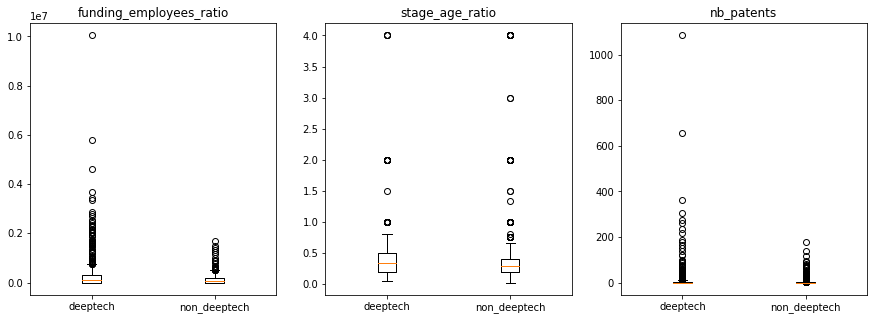

In [27]:
funding_employees_ratio = {'deeptech': deeptech["funding_employees_ratio"], 
                           'non_deeptech': non_deeptech["funding_employees_ratio"]}

stage_age_ratio = {'deeptech': deeptech["stage_age_ratio"], 
                   'non_deeptech': non_deeptech["stage_age_ratio"]}

nb_patents = {'deeptech': deeptech["nb_patents"], 
                   'non_deeptech': non_deeptech["nb_patents"]}

fig, axs = plt.subplots(1, 3, figsize = (15, 5))
axs[0].boxplot(funding_employees_ratio.values())
axs[0].set_xticklabels(funding_employees_ratio.keys())
axs[0].set_title("funding_employees_ratio")

axs[1].boxplot(stage_age_ratio.values())
axs[1].set_xticklabels(stage_age_ratio.keys())
axs[1].set_title("stage_age_ratio")

axs[2].boxplot(nb_patents.values())
axs[2].set_xticklabels(nb_patents.keys())
axs[2].set_title("nb_patents")

In [54]:
barplot_list = ["doctor_yesno", 'has_strong_founder','has_super_founder',
                'technical_background','health_industry','semiconductors_industry',
                'energy_industry', 'biotechnology_tags','neurology_tags',
                'fund_investors_type' ]

In [55]:
len(barplot_list)

10

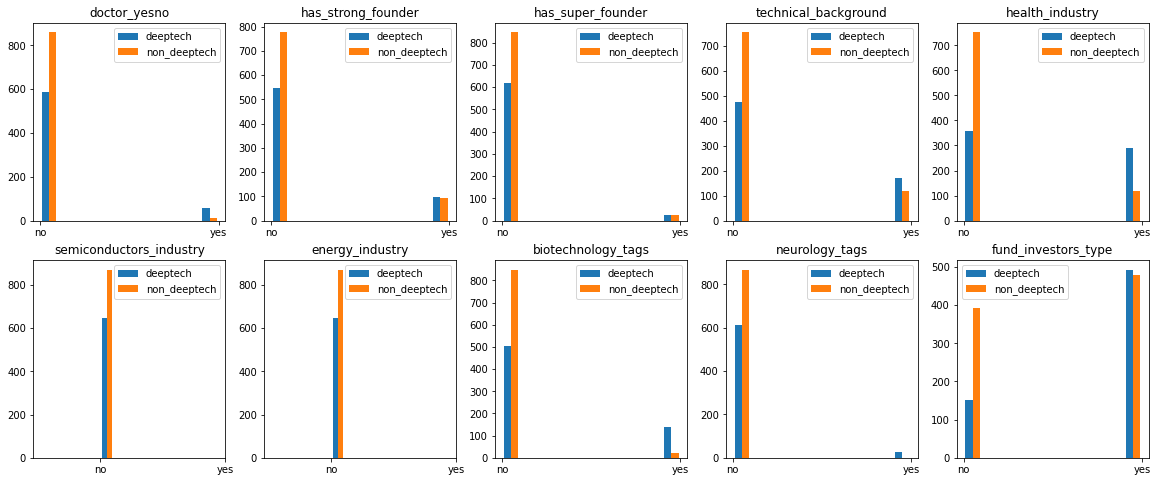

In [97]:
plt.subplots(2, 5, sharey = False, figsize = (20, 8))

for i, cols in enumerate(barplot_list):
    features = {'deeptech': deeptech[cols], 
            'non_deeptech': non_deeptech[cols]}
    plt.subplot(2, 5, i+1)
    plt.hist(features.values())
    plt.xticks([0,1], ["no", "yes"])
#    plt.set_title(features)
    plt.legend(["deeptech", "non_deeptech"])
    plt.title(cols)
plt.show()
    

In [133]:
deeptech[["energy_industry", "doctor_yesno"]].value_counts()

energy_industry  doctor_yesno
0                0               586
                 1                58
dtype: int64

In [99]:
non_deeptech[["energy_industry"]].value_counts()

energy_industry
0                  870
dtype: int64

Index(['target', 'doctor_yesno', 'funding_employees_ratio',
       'has_strong_founder', 'has_super_founder', 'stage_age_ratio',
       'nb_patents', 'technical_background', 'health_industry',
       'semiconductors_industry', 'energy_industry',
       'commission_income_streams', 'biotechnology_tags', 'neurology_tags',
       'saas_tags', 'fund_investors_type', 'Agoranov_investors_name',
       'binary_prediction', 'probabilities', 'res_analysis'],
      dtype='object')

## FN et FP exploration 

In [18]:
dictdeeptech = {1:"deeptech", 0:"non_deeptech"}

X_features = outputs.drop(columns = ["commission_income_streams", "saas_tags", "Agoranov_investors_name", 
                                     'binary_prediction', 'probabilities' ])

X_features["target"] = X_features["target"].map(dictdeeptech)

/Users/catherinechen/.pyenv/versions/3.8.6/envs/deep4deep2/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning:

Dataset has 0 variance; skipping density estimate.

/Users/catherinechen/.pyenv/versions/3.8.6/envs/deep4deep2/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning:

Dataset has 0 variance; skipping density estimate.

/Users/catherinechen/.pyenv/versions/3.8.6/envs/deep4deep2/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning:

Dataset has 0 variance; skipping density estimate.

/Users/catherinechen/.pyenv/versions/3.8.6/envs/deep4deep2/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning:

Dataset has 0 variance; skipping density estimate.



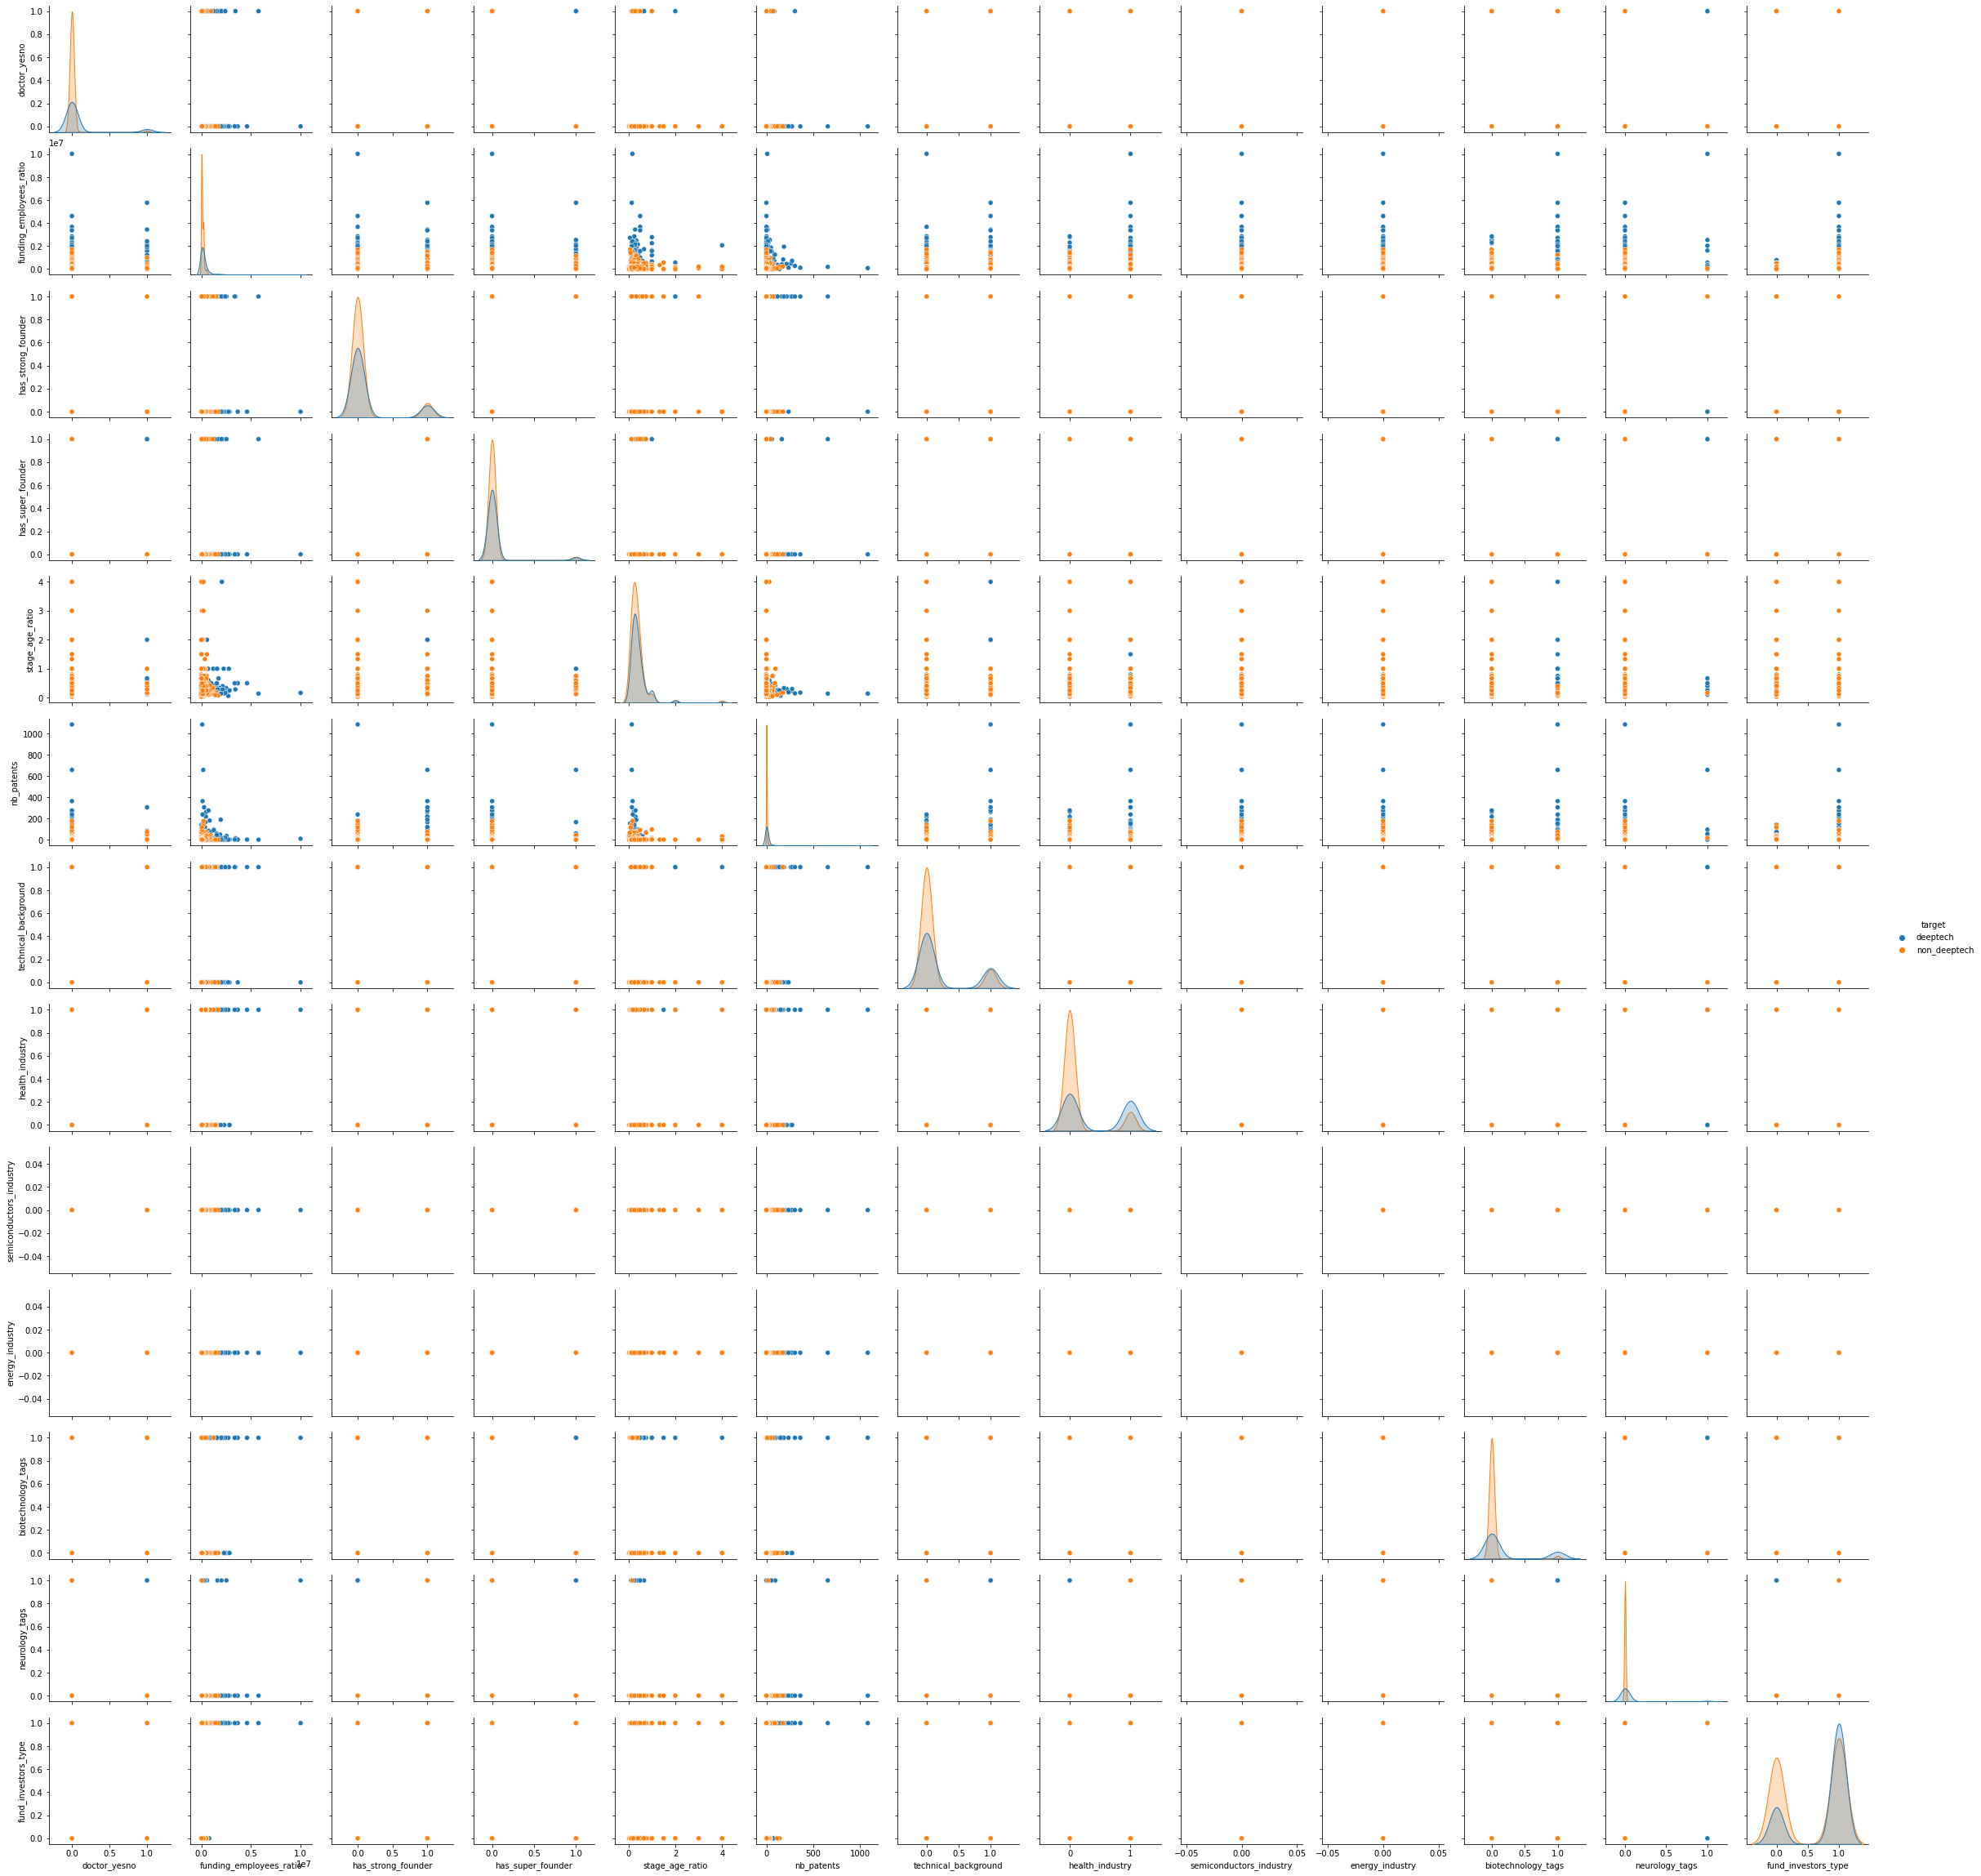

In [19]:
import seaborn as sns 

sns.pairplot(X_features, hue = "target")

In [20]:
conditions = [
    (outputs.target == 0) & (outputs.binary_prediction == 1),
    (outputs.target == 1) & (outputs.binary_prediction == 0),
    (outputs.target == 0) & (outputs.binary_prediction == 0),
    (outputs.target == 1) & (outputs.binary_prediction == 1)
    ]

values = ['FP', 'FN', 'non_deeptechOK', 'deeptechOK']

outputs["res_analysis"] = np.select(conditions, values)
outputs.head(5)

target  doctor_yesno  funding_employees_ratio  has_strong_founder  \
0       1             0             0.000000e+00                   0   
1       1             0             0.000000e+00                   0   
2       1             1             7.241379e+05                   0   
3       1             1             1.547619e+05                   0   
4       1             0             2.500000e+06                   0   

   has_super_founder  stage_age_ratio  nb_patents  technical_background  \
0                  0         0.200000           0                     0   
1                  0         0.333333           7                     0   
2                  0         0.250000          84                     1   
3                  0         0.500000           0                     1   
4                  0         0.333333           0                     0   

   health_industry  semiconductors_industry  energy_industry  \
0                1                        0                0   
1                1                        0                0   
2                0                        0                0   
3                1                        0                0   
4                1                        0                0   

   commission_income_streams  biotechnology_tags  neurology_tags  saas_tags  \
0                          0                   0               0          0   
1                          0                   0               0          0   
2                          0                   1               0          0   
3                          0                   1               0          0   
4                          0                   0               0          0   

   fund_investors_type  Agoranov_investors_name  binary_prediction  \
0                    0                        0                  0   
1                    0                        0                  0   
2                    1                        0                  1   
3                    1                        0                  1   
4                    1                        0                  1   

   probabilities res_analysis  
0       0.425080           FN  
1       0.445535           FN  
2       0.958492   deeptechOK  
3       0.950307   deeptechOK  
4       0.945196   deeptechOK

/Users/catherinechen/.pyenv/versions/3.8.6/envs/deep4deep2/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning:

Dataset has 0 variance; skipping density estimate.

/Users/catherinechen/.pyenv/versions/3.8.6/envs/deep4deep2/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning:

Dataset has 0 variance; skipping density estimate.

/Users/catherinechen/.pyenv/versions/3.8.6/envs/deep4deep2/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning:

Dataset has 0 variance; skipping density estimate.

/Users/catherinechen/.pyenv/versions/3.8.6/envs/deep4deep2/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning:

Dataset has 0 variance; skipping density estimate.

/Users/catherinechen/.pyenv/versions/3.8.6/envs/deep4deep2/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning:

Dataset has 0 variance; skipping density estimate.

/Users/catherinechen/.pyenv/versions/3.8.6/envs/deep4deep2/lib/python3.8/site-package

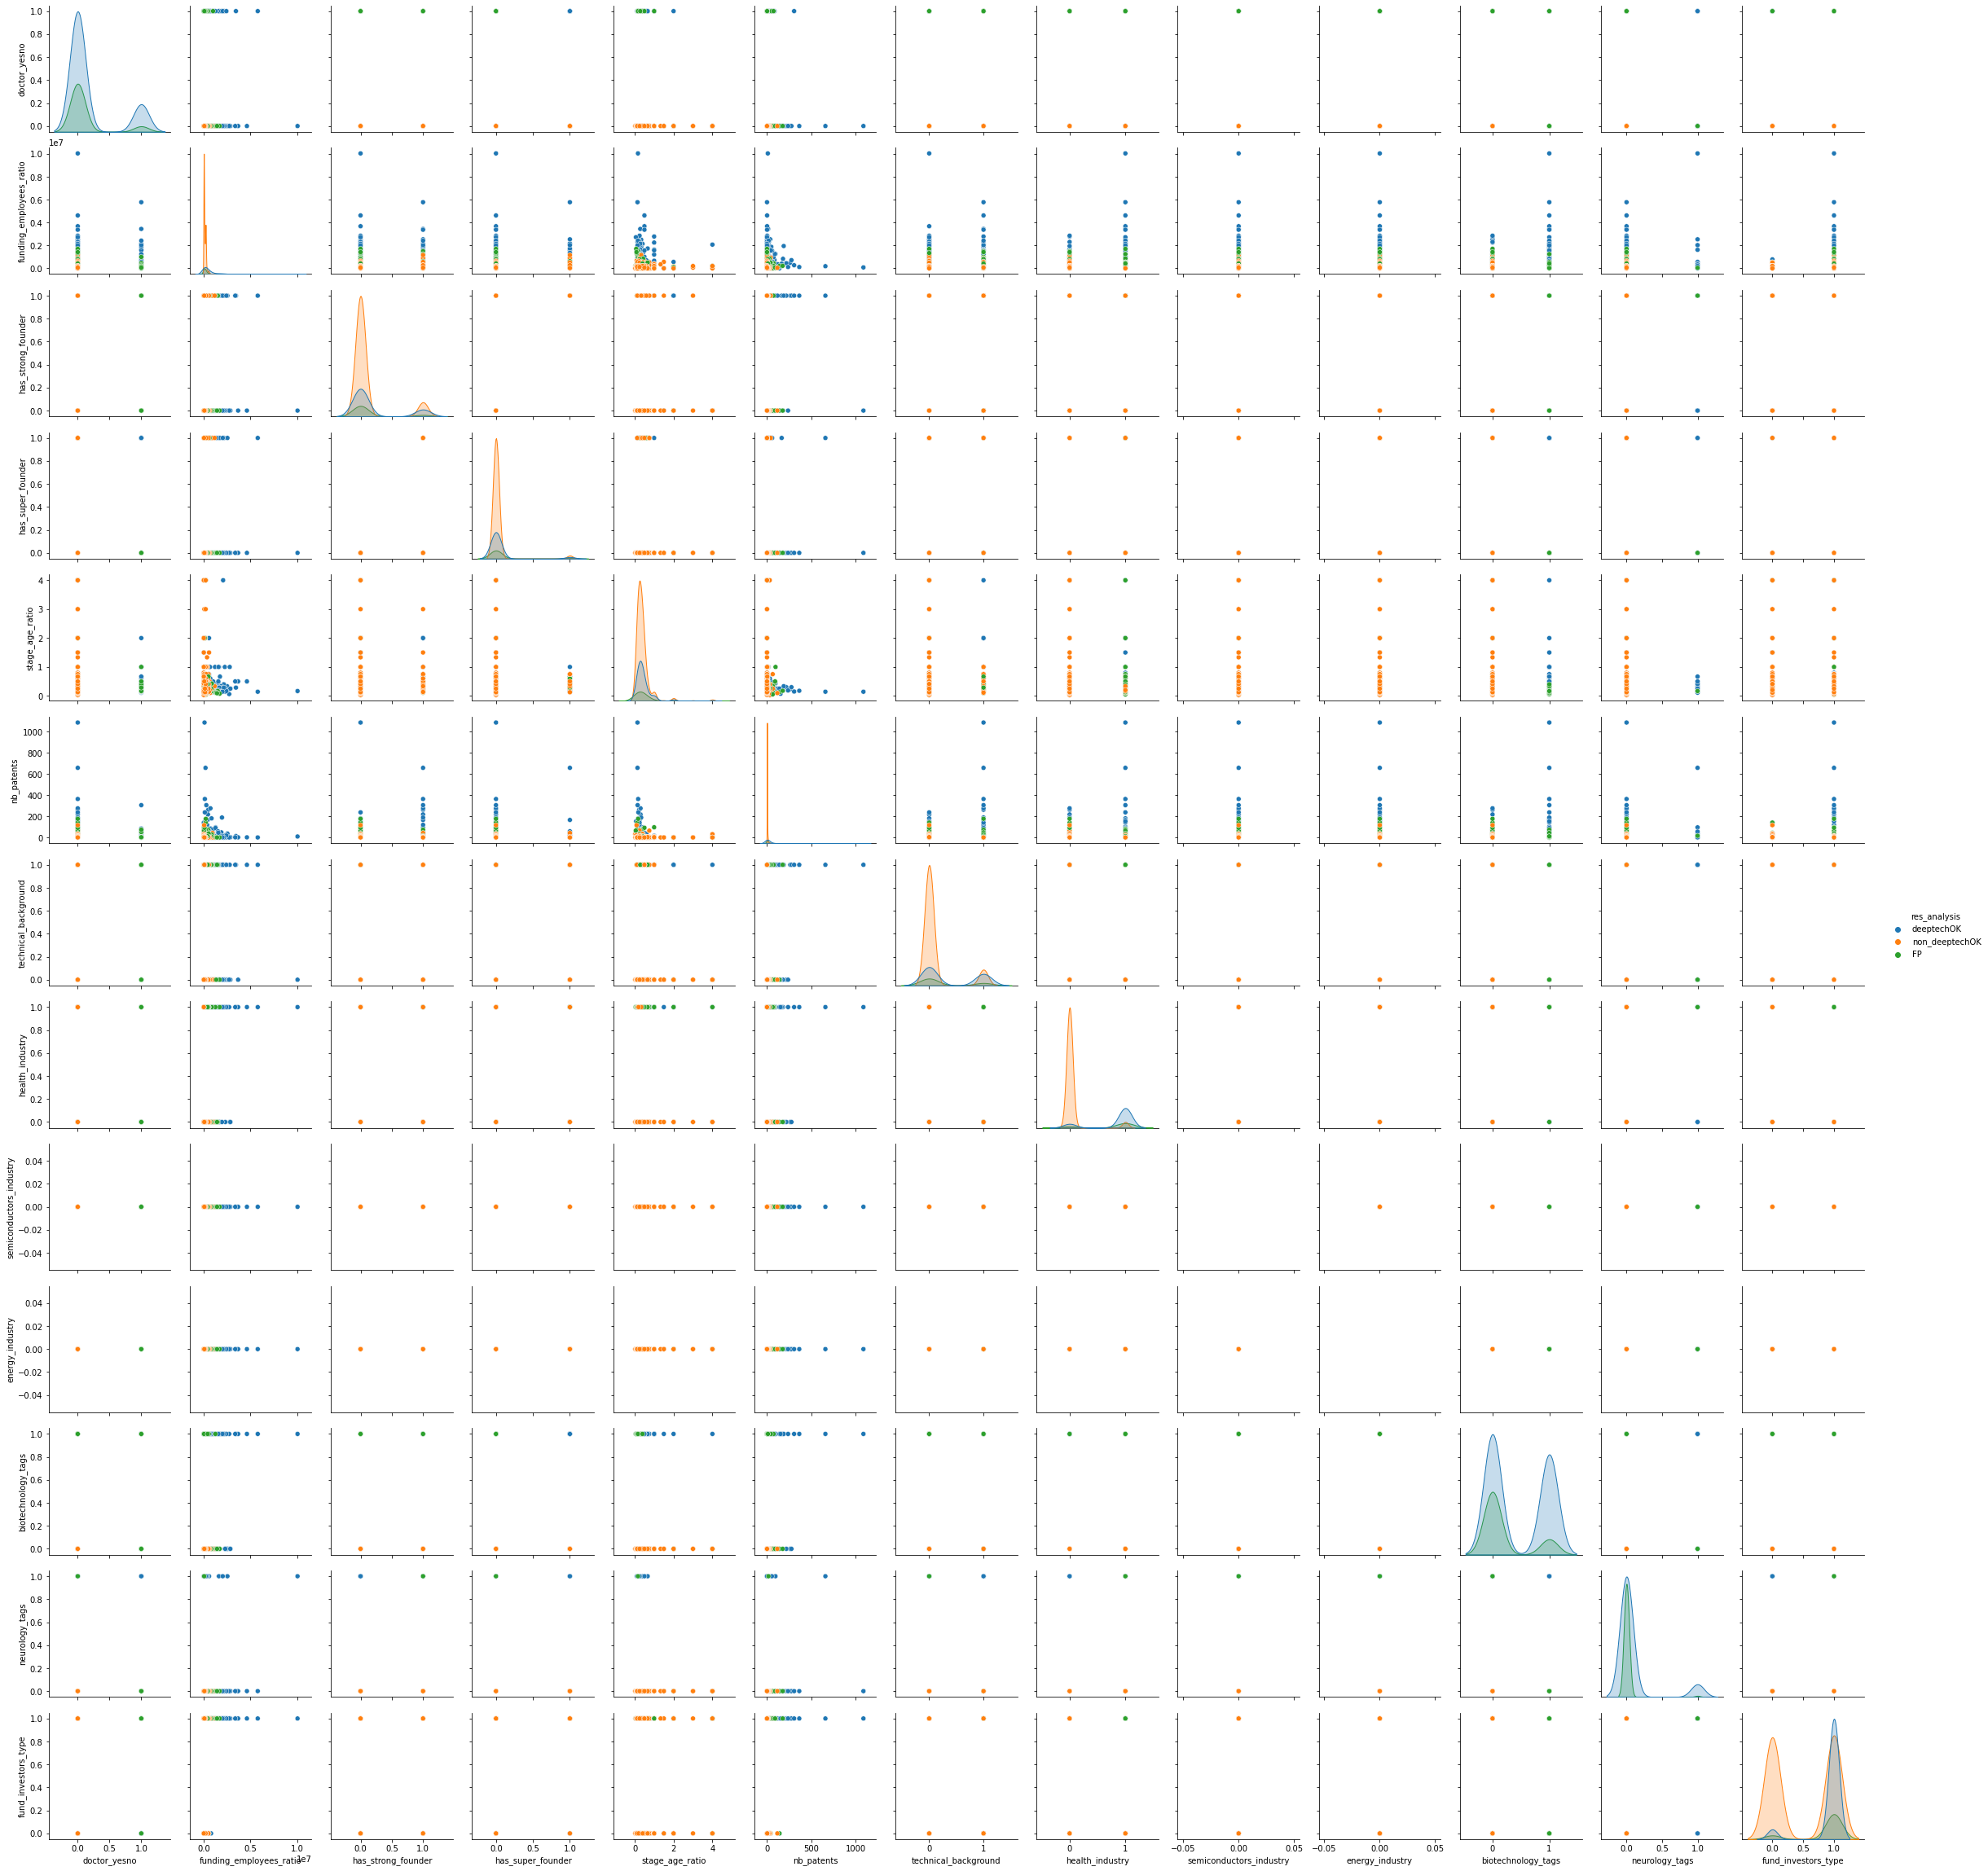

In [21]:
sns.pairplot(outputs[outputs["res_analysis"] != "FN"].drop(columns = ["target","commission_income_streams", "saas_tags", 
                                     "Agoranov_investors_name",'binary_prediction', 'probabilities']), 
             hue = "res_analysis")

In [22]:
sns.pairplot(outputs[outputs["res_analysis"] != "FP"].drop(columns = ["target","commission_income_streams", "saas_tags", 
                                     "Agoranov_investors_name",'binary_prediction', 'probabilities']), 
             hue = "res_analysis")

/Users/catherinechen/.pyenv/versions/3.8.6/envs/deep4deep2/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning:

Dataset has 0 variance; skipping density estimate.

/Users/catherinechen/.pyenv/versions/3.8.6/envs/deep4deep2/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning:

Dataset has 0 variance; skipping density estimate.

/Users/catherinechen/.pyenv/versions/3.8.6/envs/deep4deep2/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning:

Dataset has 0 variance; skipping density estimate.

/Users/catherinechen/.pyenv/versions/3.8.6/envs/deep4deep2/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning:

Dataset has 0 variance; skipping density estimate.

/Users/catherinechen/.pyenv/versions/3.8.6/envs/deep4deep2/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning:

Dataset has 0 variance; skipping density estimate.

/Users/catherinechen/.pyenv/versions/3.8.6/envs/deep4deep2/lib/python3.8/site-package

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x1114763a0> (for post_execute):


KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import plot_confusion_matrix
import joblib
from bpideep.utils import simple_time_tracker

X = outputs.drop(columns = ["target", "binary_prediction", "probabilities" ])
y = outputs["target"]
model = joblib.load("bpideepmodel.joblib")

plot_confusion_matrix(model, X, y)

# New useable features

In [ ]:
import joblib

model = joblib.load("bpideepmodel.joblib")


In [ ]:
model.get_params()

In [101]:
data = pd.read_csv("bpideep/rawdata/data.csv")

In [144]:
data.head(5)

id                    name                    path  \
0  1742681  Healthcardionexion.com  healthcardionexion_com   
1  1743314               4P Pharma               4p_pharma   
2  1598607                  AFYREN                  afyren   
3   894817               Abbelight               abbelight   
4  1683057                AblaCare                ablacare   

                                             tagline about  \
0  Notre mission : SAUVER DES VIES ! Notre presta...   NaN   
1         4P-Pharma | Translating Science to Product   NaN   
2  A company specialized in microbiology and biop...   NaN   
3  Innovative solutions in the field of super-res...   NaN   
4  AblaCare is a medical device company developin...   NaN   

                                                 url  \
0  https://app.dealroom.co/companies/healthcardio...   
1        https://app.dealroom.co/companies/4p_pharma   
2           https://app.dealroom.co/companies/afyren   
3        https://app.dealroom.co/companies/abbelight   
4         https://app.dealroom.co/companies/ablacare   

                     website_url                        twitter_url  \
0  http://healthcardionexion.com  https://twitter.com/health_cardio   
1           http://4p-pharma.com      https://twitter.com/4p_pharma   
2             http://afyren.com/  https://twitter.com/afyrenbiotech   
3       http://www.abbelight.com      https://twitter.com/abbelight   
4           https://ablacare.com       https://twitter.com/ablacare   

                                        facebook_url  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3  https://www.facebook.com/Abbelight-41213938583...   
4                                                NaN   

                                 linkedin_url  ...  \
0   https://www.linkedin.com/company/--health  ...   
1  https://www.linkedin.com/company/4p-pharma  ...   
2    https://www.linkedin.com/company/9419299  ...   
3  https://www.linkedin.com/company/abbelight  ...   
4   https://www.linkedin.com/company/ablacare  ...   

  employee_12_months_growth_delta  \
0                             NaN   
1                             NaN   
2                             NaN   
3                             NaN   
4                             NaN   

                                         kpi_summary  \
0  {'id': 1781619, 'last_update_date': '2020-07-1...   
1  {'id': 1782186, 'last_update_date': '2019-09-1...   
2  {'id': 125243, 'last_update_date': '2020-07-31...   
3  {'id': 322106, 'last_update_date': '2020-07-31...   
4  {'id': 1748009, 'last_update_date': '2020-07-3...   

                                                team  \
0                          {'items': [], 'total': 0}   
1  {'items': [{'id': 1989389, 'name': 'Revital Ra...   
2  {'items': [{'id': 1598841, 'name': 'Jérémy Pes...   
3  {'items': [{'id': 1159925, 'name': 'Jean-Bapti...   
4  {'items': [{'id': 1683129, 'name': 'Jodie Fam'...   

                                           investors  \
0                          {'items': [], 'total': 0}   
1                          {'items': [], 'total': 0}   
2  {'items': [{'id': 17581, 'name': 'Sofinnova Pa...   
3  {'items': [{'id': 885471, 'name': 'Agoranov', ...   
4  {'items': [{'id': 1237998, 'name': 'Sofinnova ...   

                                            fundings  \
0  {'items': [{'id': 325238, 'year': 2017, 'month...   
1                          {'items': [], 'total': 0}   
2  {'items': [{'id': 239735, 'year': 2019, 'month...   
3  {'items': [{'id': 301677, 'year': 2019, 'month...   
4  {'items': [{'id': 275644, 'year': 2019, 'month...   

                                             traffic  \
0  {'visitors': '47', 'annual_growth': -70.987654...   
1  {'visitors': '479', 'annual_growth': None, 'so...   
2  {'visitors': '176', 'annual_growth': None, 'so...   
3  {'visitors': '1668', 'annual_growth': 

In [117]:
data[data.name == "AFYREN"]["tags"].values

array(['[]', "['investing', 'risk management']",
       "['biotechnology', 'sustainable development goals', 'core sustainable impact', 'biomass', 'agritech', 'alternative protein', 'affordable and clean energy (#7)', 'climate action (#13)']",
       ...,
       "['analytics', 'sourcing', 'procurement', 'contract management', 'industrial technology']",
       '[]', "['retail', 'payment', 'loyalty program', 'crm']"],
      dtype=object)

In [129]:
import json
import re
def load_json_field(bad_json):
    regex = r"\w\'\w"
    subst = ""
    bad_json = re.sub(regex, subst, bad_json)
    bad_json = bad_json.replace("d' Arrouzat", "darrouzat")
    good_json = bad_json.replace("\'", "\"").replace("None", "null").replace("True", "true").replace("False", "false")
    
    return json.loads(good_json)

available_tags = []

for row in data["tags"]:
    row2 = load_json_field(row)
    print(row2)
    for tag in row2:
        available_tags.append(tag)

[]
['investing', 'risk management']
['biotechnology', 'sustainable development goals', 'core sustainable impact', 'biomass', 'agritech', 'alternative protein', 'affordable and clean energy (#7)', 'climate action (#13)']
['imaging technology', 'biotechnology', 'eic', 'nanoscopy', 'microscopy', 'sustainable development goals', 'good health and well-being (#3)']
['non-invasive', 'health care', 'medical device', 'femtech']
['vivatech2019']
['medical / healthcare', 'touchscreen', 'human computer interaction', 'gesture recognition', 'vivatech2019', 'platform', 'arts & culture', 'search engine']
['biotechnology']
[]
['printing']
['clean water and sanitation (#6)', 'sustainable development goals']
['investing', 'biotechnology', 'testing', 'polymer', 'repair']
['biotechnology', 'medical device', 'medical']
['chemistry']
['biotechnology', 'health care', 'health diagnostics', 'life science', 'neuroscience']
['power']
['health care']
['radio', 'network', 'lte', '4g', 'banking', 'streaming', 'commu

['vivatech2019', 'arts & culture']
[]
['arts & culture']
['trading', 'trading platform']
[]
[]
[]
['robotic', 'senior care']
['platform']
[]
['adherent french tech one']
[]
['collaboration', 'vivatech2019', 'freemium', 'platform']
['monitoring', 'wealth management', 'banking', 'risk management', 'reporting']
['outside tech']
[]
[]
['cloud computing', 'techscale200', 'missionfrenchtech']
[]
['monitoring', 'branding', 'channel', 'control systems']
[]
['vivatech2019', 'motion', 'eyewear', 'vehicle']
['monitoring', 'sensor']
[]
['reality']
['search engine optimization', 'analytics', 'saas', 'seo', 'traffic', 'deal comparison', 'sharing economy', 'navigation', 'verification', 'testing', 'automated process', 'automated technology', 'certification', 'search engine']
[]
[]
['pr', 'telecommunications']
[]
[]
[]
[]
['saas', 'platform', 'genetics', 'dna', 'genome engineering']
['diabetes', 'medical device', 'biotechnology', 'medical / healthcare', 'biomedical', 'health', 'monitoring', 'investing'

In [130]:
list(set(available_tags))

['neuro stimulation',
 'electronic switching solutions',
 'information services',
 'car rental',
 'channel',
 'photonic integrated circuits',
 'travel &amp; expense management',
 'small and medium businesses',
 'missionfrenchtech',
 'business intelligence',
 'dapp',
 'electric vehicle',
 'career',
 'data protection',
 'risk management',
 'storage',
 'sharing economy',
 'advertising',
 'tourism',
 'hydropower',
 'control',
 'outdoor',
 'welding technology',
 'industrial lasers',
 'sports activity and performance',
 'engineering',
 'adtech',
 'decision making',
 'smart building',
 'plant protection',
 'spectrometry',
 'call',
 'innovative food',
 'peer-to-peer',
 'enterprise resource planning',
 'developer tools',
 'watch',
 'protein',
 'entertainement',
 'healthtech',
 'vitamin',
 'car',
 'turbine',
 'patient care',
 'medical technology',
 'refrigeration',
 'biopolymers',
 'kid',
 'film production',
 'primary production',
 'preparation',
 'conversational ai',
 'irrigation',
 'threat int